# HW04 - Neural Networks: Multi-Layer Perceptron (MLP Model)

### Name: Maida Raza

### Assignment Description: 

In this assignment, I analyzed and extracted insights from data laid out in XOR pattern, with classes that cannot be separated by techniques like Logistic Regression. 

To do so, I built a neural network classifier with a single hidden layer. I then employed two different optimization algorithms: Stochastic Gradient Descent (SGD) and Limited Memory Broyden-Fletcher-Goldfarb-Shanno (L-BFGS). I compared the algorithms over two activation functions: Rectified Linear Unit (ReLU) and Sigmoid. I analyzed the differences between different combinations of optimization algorithms and activation functions using loss curves, weight updates, and the decision boundaries learned by the 16 randomized models that I built for every combination.

#### Import required libraries

In [42]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [43]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

x_tr_N2

array([[ 0.68569276,  1.04523773],
       [-0.95284555,  0.99136251],
       [-1.45835696,  1.24814353],
       ...,
       [-0.94491867, -0.96273493],
       [-0.90945295,  0.99978794],
       [-0.98766188,  1.20346489]])

### Author Notes Regarding The Task:

* Neural networks are a class of machine learning models inspired by the structure and function of the human brain. They're used to recognize patterns, make predictions, and solve complex problems like image recognition, natural language processing, and game playing.

* They process input to produce output, but are hidden from the user. Think of a function that learns in the background. Too many of them can cause the model to be overtrained.

* L-BFGS is basically a more complex method using both first and second derivatives to do weight propagation. Essentially, in this task, we will compare SGD and BFGS on two activation functions, i.e., ReLU and Sigmoid.

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

Build models with two hidden nodes that use the ReLU activation, and optimizing using L-BFGS. Train 16 separate such models, each one using a different random initialization-state; to do so, each model should be built with random_state set to 0, 1, 2, . . . , 15, in order.

(a) Plot a 2D visualization of the learned decision boundaries for each of the 16 models.

(b) What fraction of the runs achieve 0 error? What happens in other cases, and why do
you suppose this is? How long, on average, does it take the models to converge?

In [ ]:
n_runs = 16
run_time =[]
relu_lbfgs_models = [] # storing the new models here

for r in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        solver ='lbfgs',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=r,
        )
    
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    run_time.append(elapsed_time_sec)
    
    #Store the training model
    relu_lbfgs_models.append(mlp_lbfgs)
    converged = mlp_lbfgs.n_iter_ < mlp_lbfgs.max_iter
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        r+1, n_runs, elapsed_time_sec,
        mlp_lbfgs.n_iter_,
        'converged   ' if converged else 'NOT converged',
        mlp_lbfgs.loss_))


finished LBFGS run  1/16 after    0.0 sec |  28 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.0 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  3/16 after    0.0 sec |  20 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.0 sec |  34 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.0 sec |  27 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    0.0 sec |  28 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  22 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  36 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.0 sec |  14 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.0 sec |  25 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    0.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.0 sec |  26 iters | converged    | loss 0.477
finished LBFGS r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

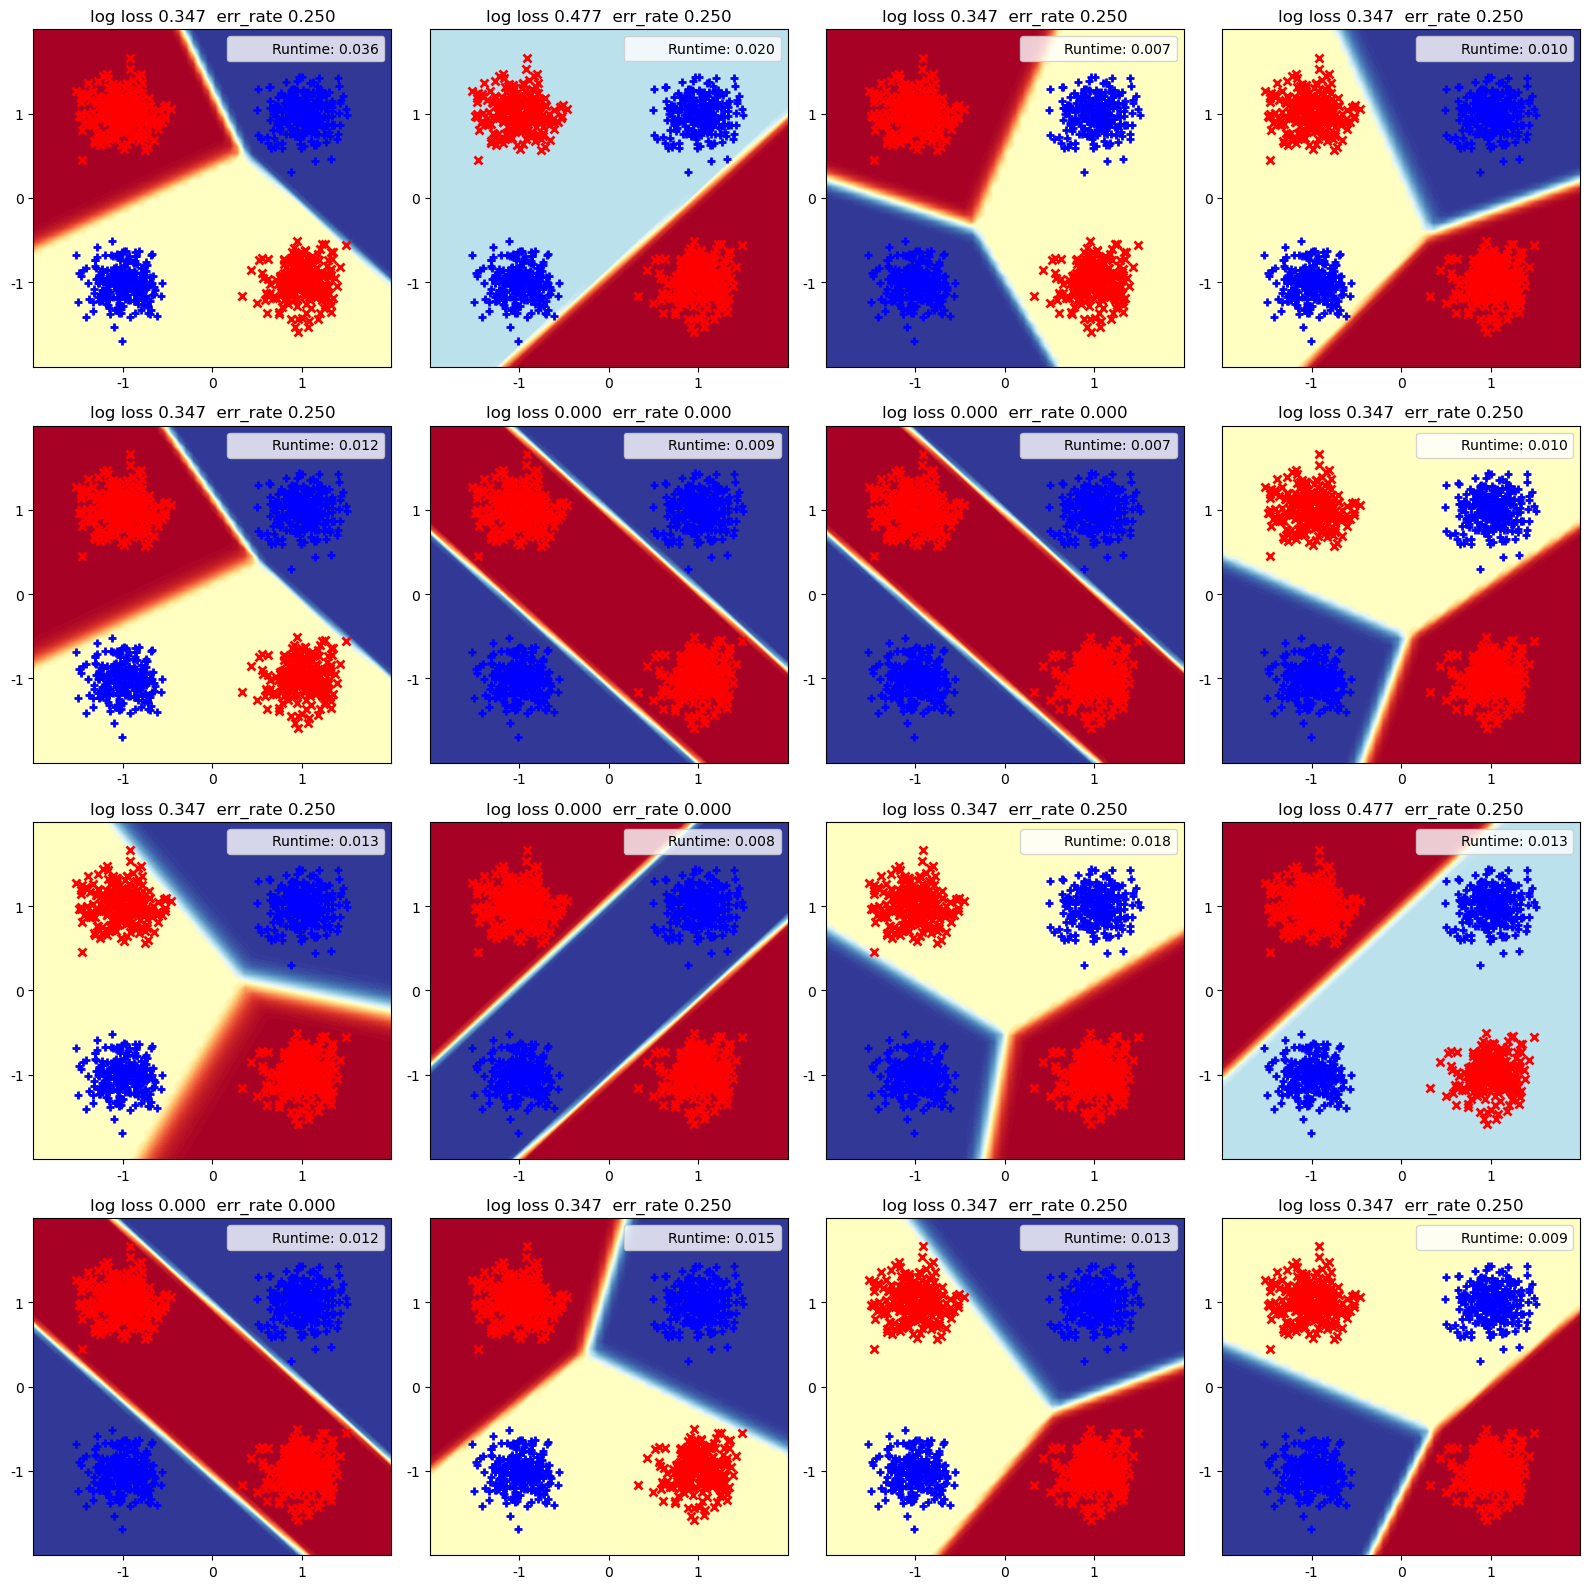

In [45]:
#plot.pretty is a helper function that plots the decision boundary 

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = ax_grid.flatten()

for i, model in enumerate(relu_lbfgs_models):
    ax = axes[i]
    plot_pretty_probabilities_for_clf(model, x_tr_N2, y_tr_N, ax=ax)
    ax.plot([],[],label=f"Runtime: {run_time[i]:.3f}", color = 'none')
    ax.legend()
plt.tight_layout()    
plt.show()

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 

1/4 (25%) of the models achieve a 0 training error. The remaining 12 (75%) models do not have a non-zero training error, meaning that these models are misclassifying the data points. It happens because each model starts at a different initial Random State, meaning that different weights are assigned to features at different model iterations. This leads to different optimization paths and different final model results. Hence, we see three different loss values across all 16 model iterations. These loss values are 0.0 for 4-models (25%), 0.347 for 10-models (62.5%), and 0.477 for 2-models (12.5%). The higher loss values of 0.347 and 0.477 indicate that the models are getting stuck in local minimas, with loss = 0.477 as the worst performing models. 

Almost all of the models are converging at an average of 0 seconds and under 40 iterations, as shown above. I believe this may be because LBFGS is an efficient solver and the training dataset is relatively smaller, with ~ 1000 observations.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver

Repeat the process to build 16 randomized models, each of which combines the logistic Sigmoid activation with the L-BFGS solver. Again, plot each of the decision boundaries, and analyze the performance just as before.

In [ ]:
n_runs = 16
sigmoid_lbfgs_models = []
sigmoid_lbfgs_times = []

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs_sigmoid = MLPClassifier(
        hidden_layer_sizes= [2],
        alpha=0.0001,
        activation='logistic',
        solver = 'lbfgs',
        max_iter=200, tol=1e-6,
        random_state=i
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs_sigmoid.fit(x_tr_N2, y_tr_N)
        
    elapsed_time_sec = time.time() - start_time_sec
    sigmoid_lbfgs_times.append(elapsed_time_sec)
    
    converged_2 = mlp_lbfgs.n_iter_ < mlp_lbfgs.max_iter
    sigmoid_lbfgs_models.append(mlp_lbfgs_sigmoid)
    
    print(f'finished Sigmoid-LBFGS run {i+1}/{n_runs} after {elapsed_time_sec:.1f} sec | {mlp_lbfgs.n_iter_} iters | {"converged" if converged_2 else "Not converged"} | loss {mlp_lbfgs_sigmoid.loss_}')




finished Sigmoid-LBFGS run 1/16 after 0.1 sec | 29 iters | converged | loss 7.799306272642297e-05
finished Sigmoid-LBFGS run 2/16 after 0.0 sec | 29 iters | converged | loss 0.34663826729965674
finished Sigmoid-LBFGS run 3/16 after 0.0 sec | 29 iters | converged | loss 0.3466248129425607
finished Sigmoid-LBFGS run 4/16 after 0.0 sec | 29 iters | converged | loss 8.217509632222203e-05
finished Sigmoid-LBFGS run 5/16 after 0.0 sec | 29 iters | converged | loss 0.4774331891238489
finished Sigmoid-LBFGS run 6/16 after 0.0 sec | 29 iters | converged | loss 8.178931251016014e-05
finished Sigmoid-LBFGS run 7/16 after 0.0 sec | 29 iters | converged | loss 8.174201300804159e-05
finished Sigmoid-LBFGS run 8/16 after 0.0 sec | 29 iters | converged | loss 0.4774400909108079
finished Sigmoid-LBFGS run 9/16 after 0.0 sec | 29 iters | converged | loss 0.34663655738593224
finished Sigmoid-LBFGS run 10/16 after 0.0 sec | 29 iters | converged | loss 0.34662447977050204
finished Sigmoid-LBFGS run 11/16 a

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

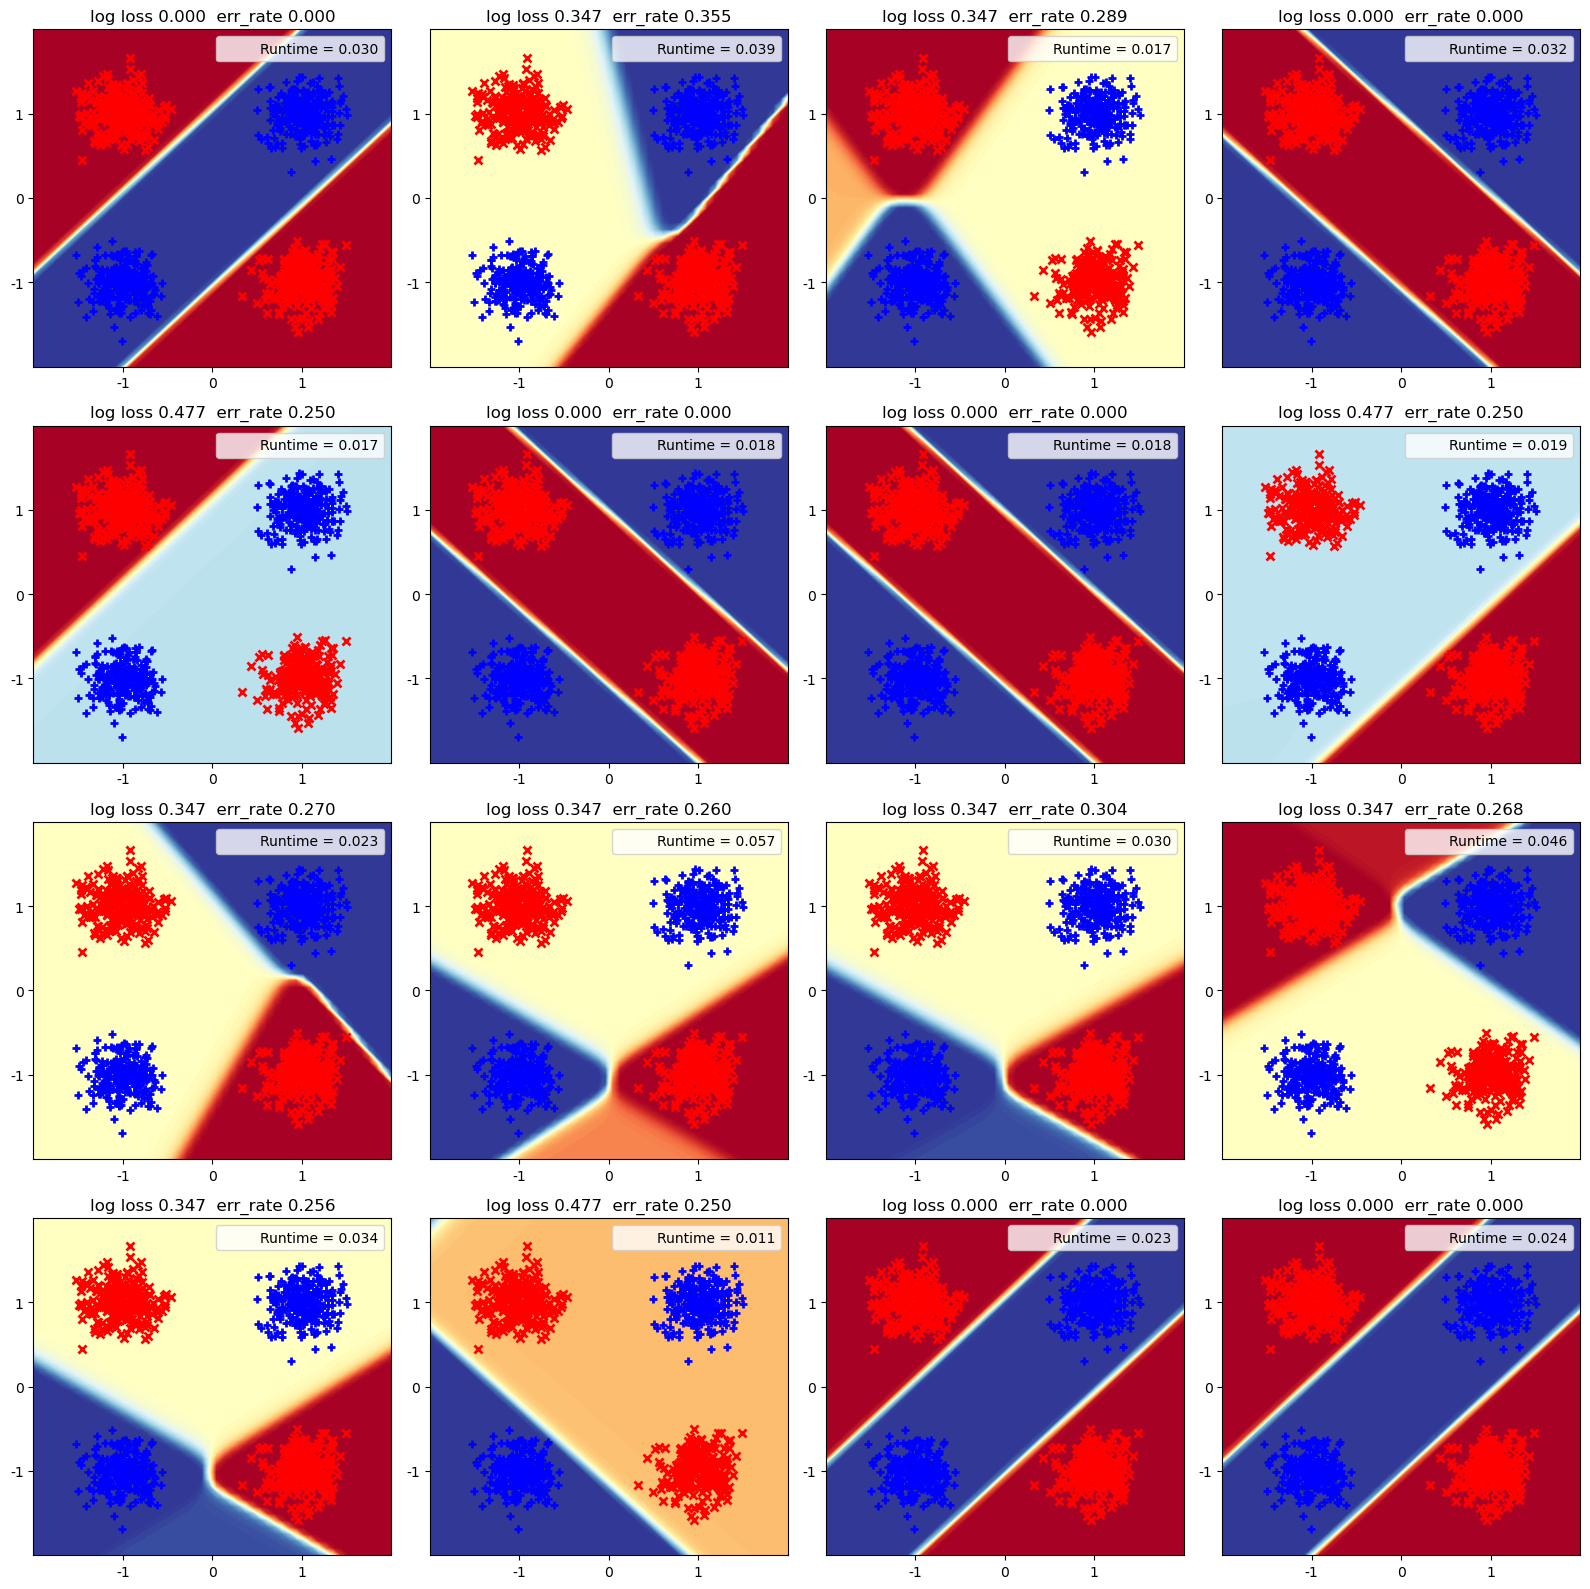

In [47]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

axes = ax_grid.flatten()

for i, smodel in enumerate(sigmoid_lbfgs_models):
    ax = axes[i]
    plot_pretty_probabilities_for_clf(smodel, x_tr_N2, y_tr_N, ax=ax)
    ax.plot([],[], label=f"Runtime = {sigmoid_lbfgs_times[i]:.3f}", color ='none')
    ax.legend()
plt.tight_layout()
plt.show()

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 

6/16 (37.5%) models achieve zero training error in this case, these models also have a loss of ~0.0. Out of the other 10 models with non-zero training error, 7 models (43.75%) have a loss of 0.347 and 3 models (18.75%) have a loss of 0.477. Again, I believe the models with non-zero loss rate are getting stuck in the local minima and that is because the models start at different Random States. 

However, note that the ratio of models with zero-training error has increased from 25% to 37.5% whereas the ratio of models with non-zero training errors has decreased from 75% to 62.5% when compared with LBFGS with ReLU. This implies that LBFGS with Sigmoid is more robust/easier to optimize than LBFGS with ReLU (a simple Linear piece-wise activation function).

On average, the models are still converging at 0 seconds. However, note that the models take fewer iterations, i.e., less than 30, to converge when we use Sigmoid with LBFGS. This suggests that ReLU introduces a more challenging optimization landscape for L-BFGS. This doesn't mean ReLU is worse—just that it's less smooth, and L-BFGS needs more steps to handle it.

### Notes:

* the model is using 10 training examples per weight update step here, runs 400 total passes through the data, stopping early iff the loss value changes by no more than tolerance (tol)

* SGD is less complex than L-BFGS in the sense that it uses the first derivate for weight update. L-BFGS uses first and the second derivatives for the update

### Problem 3: MLP size [2] with activation ReLU and SGD solver

Use the default sklearn MLPClassifier model, with the ReLU activation, buttrained using SGD. Again, you should build 16 models with random seeds in 0, 1, . . . , 15,setting up the models to do stochastic gradient descent as follows:

* solver='sgd'
* batch_size=10
* max_iter=400
* tol=1e-8
* learning_rate='adaptive'
* learning_rate_init=0.1
* momentum=0.0

That is, your models use 10 training examples per weight update step, for 400 total passes through the data, stopping early only if loss values change by no more than the tolerance (tol), and modifying the learning rate as it goes.

Again, plot the decision boundaries learned by each of the 16 models, and analyze the performance rates as before. In addition, discuss the difference between the results you see here and those from the first set of models, which also used the ReLU activation, but optimized differently—what are the most noticeable differences between the runs, and why do you suppose this happens?

In [ ]:

n_runs = 16
SGD_relu_models = []
SGD_relu_time = []

for p in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=p,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
        SGD_relu_models.append(mlp_sgd)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    SGD_relu_time.append(elapsed_time_sec)
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        p+ 1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))

finished SGD run  1/16 after    3.6 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after    4.2 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    3.3 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after    5.5 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after    3.7 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after    3.7 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    3.0 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after    5.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after    5.3 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after    5.5 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

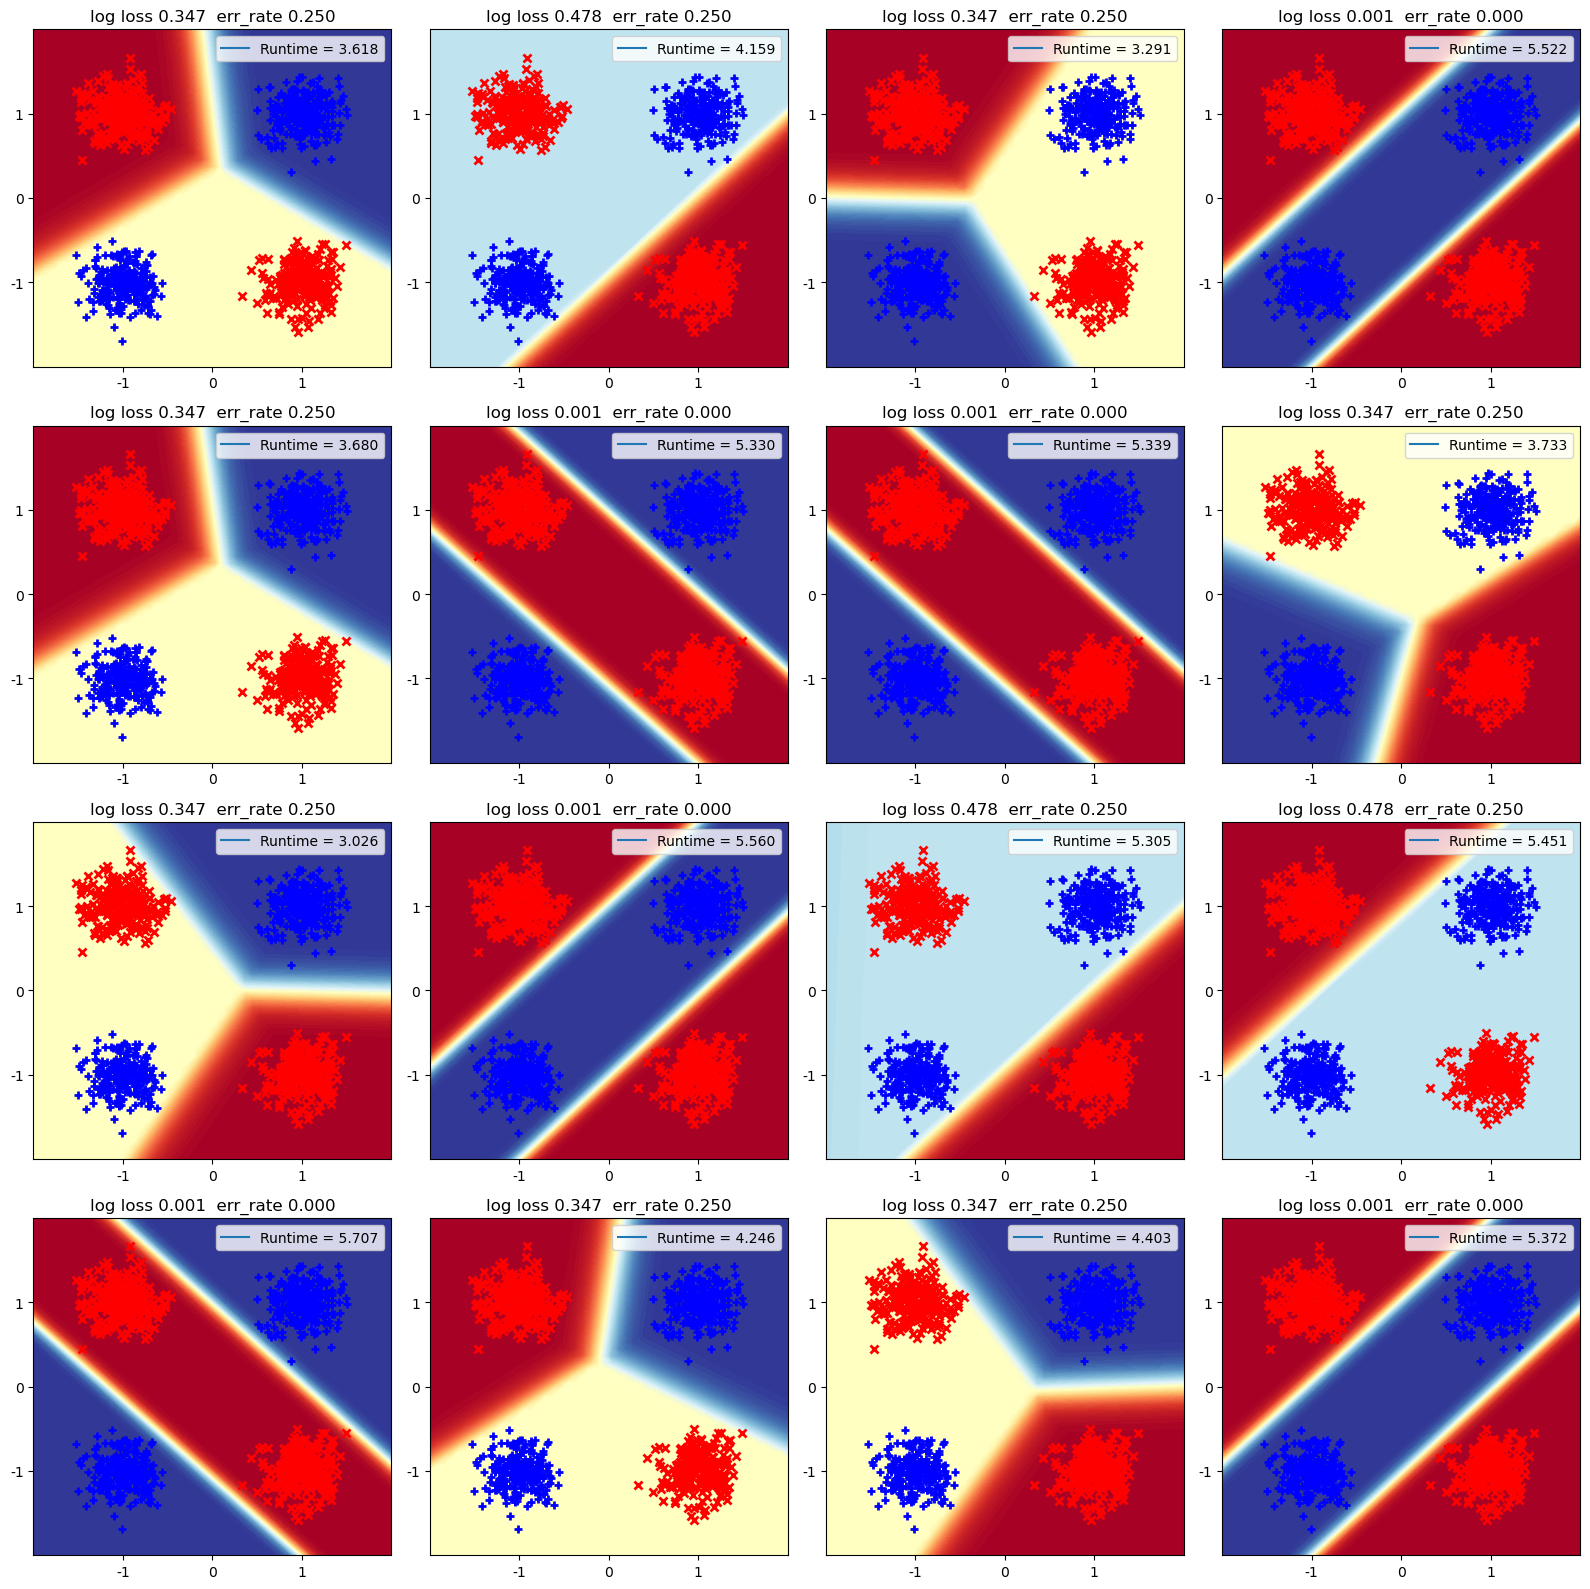

In [49]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = ax_grid.flatten()

for m, model in enumerate(SGD_relu_models):
    ax = axes[m]
    plot_pretty_probabilities_for_clf(model, x_tr_N2, y_tr_N, ax=ax)
    ax.plot([],[],label=f"Runtime = {SGD_relu_time[m]:.3f}")
    ax.legend()
plt.tight_layout()
plt.show()

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 

Right off the bat, Stochastic Optimization takes a while to run when compared with L-BFGS optimization, where all of the models averagely ran under 1 second. In Stochastic Optimization, though, the models are taking between 3-6 seconds to run. 

In ReLU activation with Stochastic Gradient Descent, 6/16 (37.5%) of the models achieve a 0 training error. All of the models with 0 training error take between 5-6 seconds to run and have a loss between 0.001-0.002. 

On the other hand, 10/16 (62.5%) models have a non-zero training error and have loss of 0.347 (7 or 43.75% models) and 0.478 (3 or 18.75%). The models with non-zero training error result in incorrect classifications - misclassifying either two or three clusters of the data. I believe this may be happening because 

* All of the models start with a different random state, hence different weight are assigned, leading to different optimization paths. This means that some models are getting stuck in the local minimas.
* Our learning rate is adaptive, which means the model keeps the weights constant until the performance stalls and then changes it. Hence, we should expect some models to misclassify the data anyway. Also, changing learning rate means that our weights are consistently changing which is changing predictions in turn. 

Finally, not all models converge. Interestingly, even the models that failed to converge (i.e., hit max_iter=400) sometimes achieved near-zero training loss — suggesting that the optimizer reached a local minima, but failed to satisfy the convergence threshold.

In summary, SGD with ReLU is slower and less stable than L-BFGS, and its sensitivity to initialization and learning rate leads to diverse convergence outcomes.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: 

The most noticeable difference between SGD (with batch size 10) and L-BFGS, both using ReLU activation, is in the consistency, speed, and stability of convergence:

* Convergence Speed:

    * L-BFGS models converged much faster — all runs finished in under 1 second and required fewer iterations.
    * SGD models took 3–6 seconds and often required hundreds of epochs to converge, or hit the maximum iteration limit.

* Stability Across Runs:

    * L-BFGS produced more consistent results across different initializations, with runs converging to a small set of stable loss values (e.g., 0.000, 0.347, 0.477).
    * SGD showed more variability — both in whether models converged and in the final loss rate.

* Convergence Behavior:

    * L-BFGS always converged
    * SGD, even with adaptive learning rate, had non-converged runs (hitting max_iter=400) despite reaching near-zero training loss

I believe this happens because SGD only looks at small parts of the data at a time (batch size = 10) whereas, LBFGS takes the whole dataset into consideration. Hence, LBFGS is making better, efficient decisions. Also, LBFGS is an efficient activation anyway, so the results are not surprising.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

Repeat the process of the last step, again using SGD, but using the logistic for activation. Again, plot the results, analyze them, and then compare these results to the ones using L-BFGS with the logistic.

In [50]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation

n_runs = 16
SGD_log_models = []
SGD_log_time = []

for m in range(n_runs):
    set_start_time = time.time()
    mlp_sgd = MLPClassifier(
        solver = 'sgd',
        hidden_layer_sizes= [2],
        alpha=0.0001,
        activation = 'logistic',
        batch_size = 10,
        max_iter= 400,
        tol=1e-8,
        learning_rate = 'adaptive',
        learning_rate_init = 0.1,
        momentum = 0.0,
        random_state=m,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
        SGD_log_models.append(mlp_sgd)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - set_start_time
    SGD_log_time.append(elapsed_time_sec)

    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        m+ 1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))    
    

finished SGD run  1/16 after    2.2 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  3/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  4/16 after    2.9 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  7/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run  8/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run  9/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 10/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run 11/16 after    1.7 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

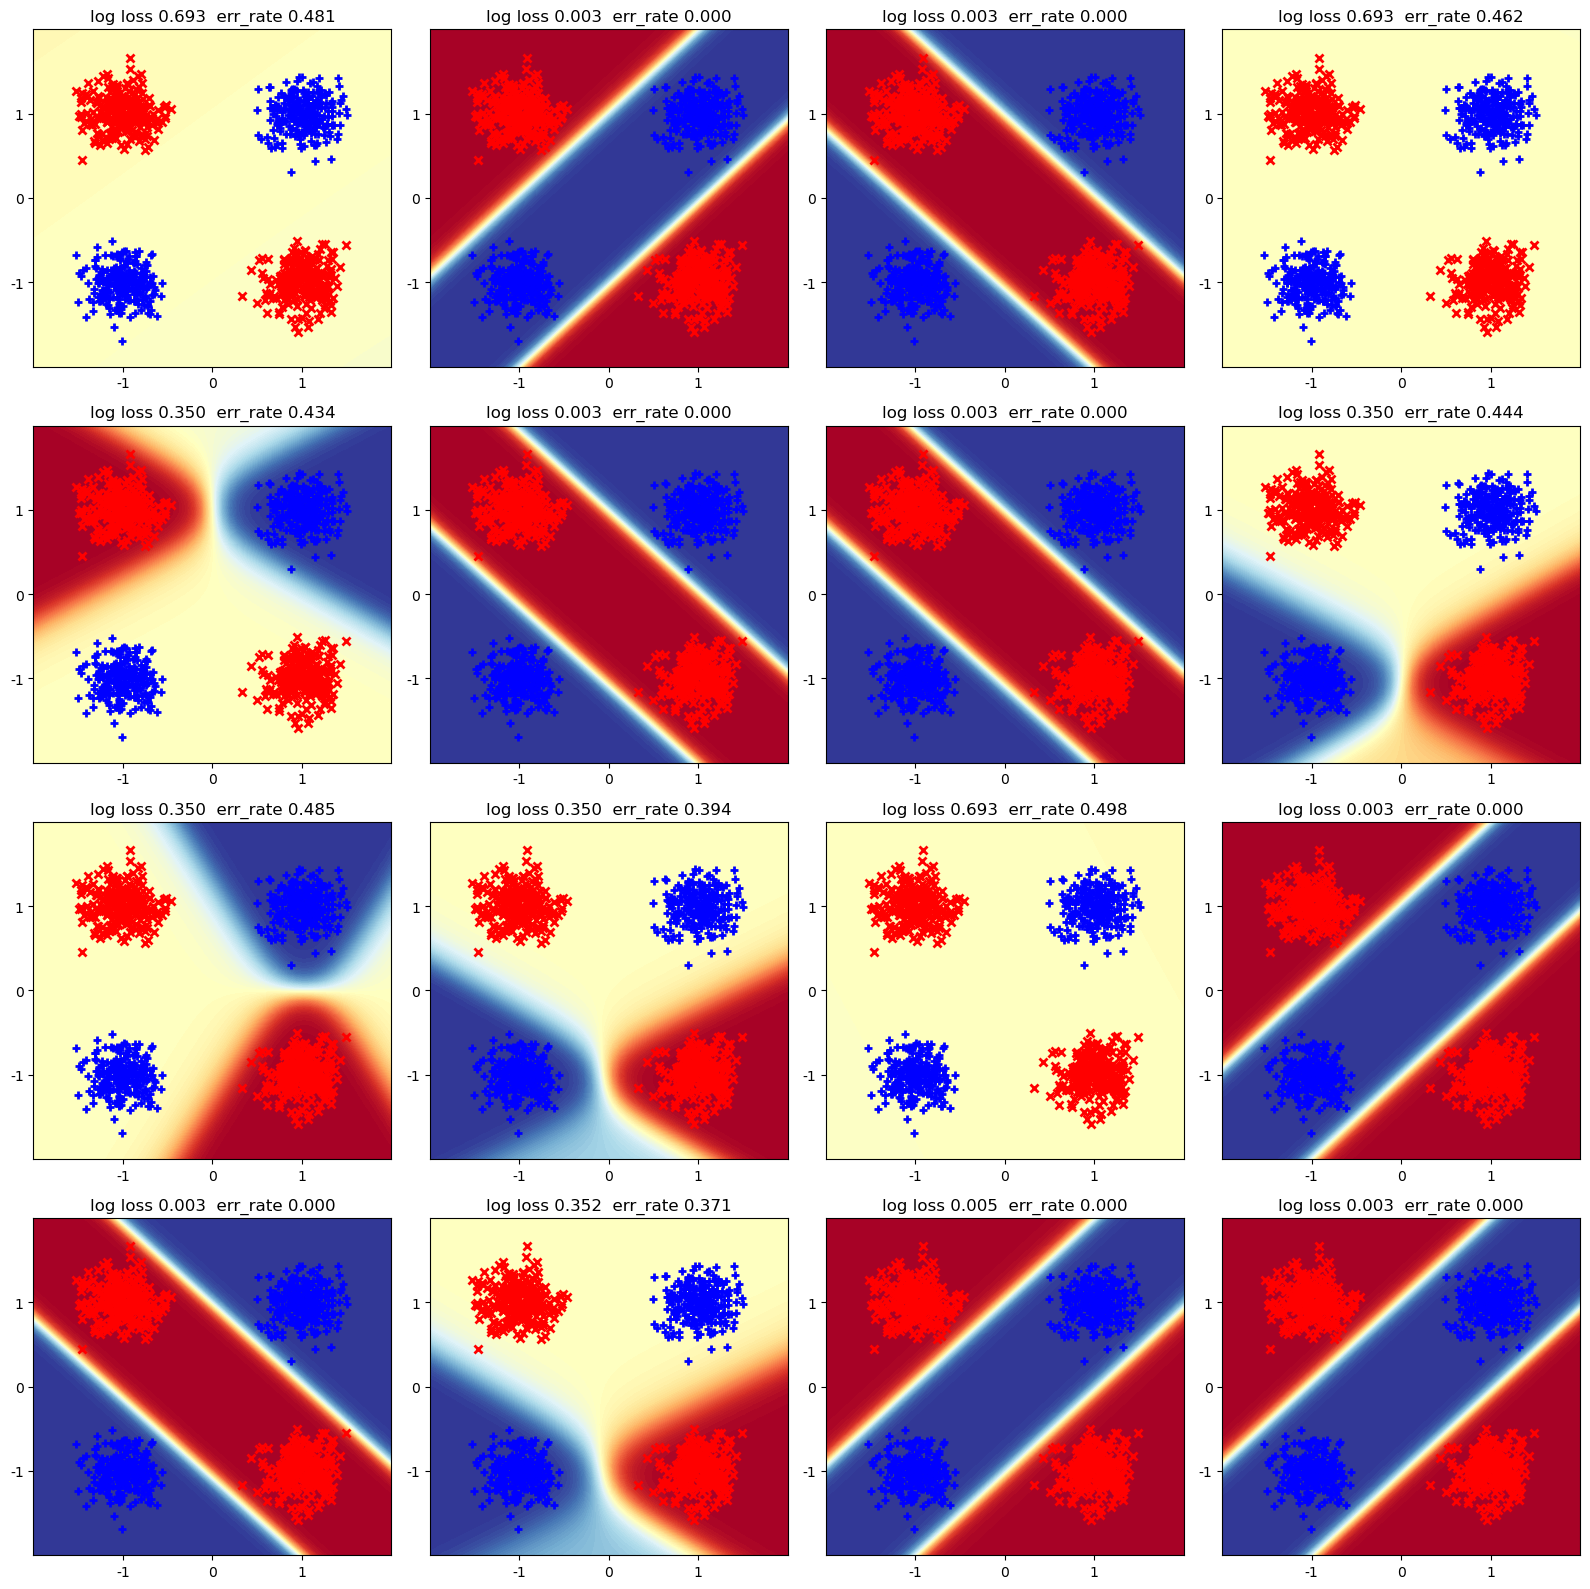

In [51]:
'MR Question: what is meant by the convergence here?'
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = ax_grid.flatten()

for u, model in enumerate(SGD_log_models):
    ax = axes[u]
    plot_pretty_probabilities_for_clf(model, x_tr_N2, y_tr_N, ax=ax)
    ax.plot([],[], label=f'Runtime = {SGD_log_time[u]:.3f}')
plt.tight_layout()
plt.show()

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 

8/16 (50%) of the models have a 0 training error when we run SGD with logistic activation. However, these zero-training error models do not have a zero loss - their loss values range from 0.003-0.005. Also, note that the models with zero training error have NOT converged.

On the other hand, the remaining 50% of the models misclassify the data. In terms of convergence, only 3/8 these models converged, with a loss of 0.693, meaning that these are models are getting stuck in a local minima. Therefore, despite converging these models did not learn useful data patterns and misclassified data points. 

Lastly, it takes comparatively longer for the models to converge/not-converge in SGD with logistic activator. Since all the parameters, including data and architecture, hidden layers is same with logistic and ReLU, I believe activation has a role to play in the high running time and poor model performances. Perhaps, Sigmoid activation is ill-suited for SGD in this setup.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: 

The running times and rate of convergence stood out to me as a main differentiator. For example, in L-BFGS with logistic activator, all of the models ran under 1 second and they all converged in less than 30 iterations. However, in SGD with logistic activator, only 3 models converged and the ones that converged had a loss rate of 0.693, meaning that they did not learn useful patterns about the data, got stuck in local minima, and misclassified the data points. Additionally, in SGD with Sigmoid activation, all models, with the exception of 3 that converged, took 400 epochs to run, and every model took 1000+ seconds to run. This may be due to 

* the batch size = 10, so updates were made based on a small portion of data
* adaptive learning rate may have reduced the learning speed too early 

Conclusively, LBFGS handles Sigmoid activation better than SGD because it uses the full dataset and second derivatives, make it more stable and efficient.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

You will now analyze the loss curves of the various model runs already completed.

(a) Plot the loss curves for each of the four groups of models in a (2×2) grid, so each panel will contain the curves for all 16 of the relevant models.

(b) Based upon these plots, and the ones you made in prior steps, which activation function seems easier to optimize? Which requires the most iterations in general?

(c) Does it appear convincing that one of the activation functions is simply easier to optimize than the other? What are three more experiments we could conduct that would help us establish if this is generally true?

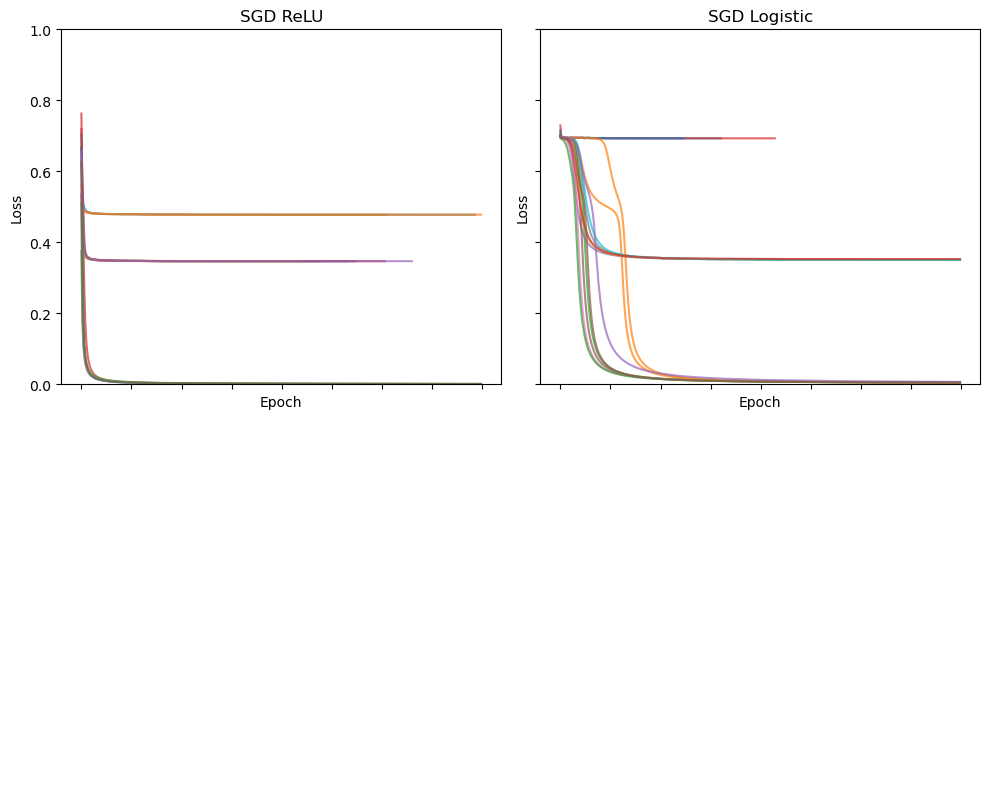

In [ ]:
all_models = relu_lbfgs_models + sigmoid_lbfgs_models + SGD_relu_models + SGD_log_models
#relu_lbfgs = [m for m in all_models if m.activation == 'relu' and m.solver == 'lbfgs']
#log_lbfgs = [m for m in all_models if getattr(m, 'activation', None) == 'logistic' and getattr(m, 'solver', None) == 'lbfgs']
relu_sgd = [m for m in all_models if getattr(m, 'activation', None) == 'relu' and getattr(m, 'solver', None) == 'sgd']
log_sgd = [m for m in all_models if getattr(m, 'activation', None) == 'logistic' and getattr(m, 'solver', None) == 'sgd']

fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(10, 8))

def plot_group(models, ax, title):
    for i, model in enumerate(models):
        loss_curve = model.loss_curve_
        ax.plot(loss_curve, alpha=0.7)  # plot on the specific axis, add transparency
    ax.set_ylim([0, 1.0])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title(title)

# Plotting each group with proper axes and titles
plot_group(relu_sgd, ax_grid[0,0], 'SGD ReLU')
plot_group(log_sgd, ax_grid[0,1], 'SGD Logistic')

ax_grid[1,0].axis('off')
ax_grid[1,1].axis('off')

plt.tight_layout()
plt.show()

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** ReLU seems consistently easier to optimize, requires fewer iterations to converge, and as noted above, takes less time than the Sigmoid activation to run

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: The evidence seems convincing. However, this is just one experiment, the dataset is relatively smaller. 

To be really sure, we may need to try different data distributions, optimizer setting, initialization, and network size. For example, in this problem, we only used 2 hidden layers. Perhaps, we can increase the number of hidden layers to see if ReLU's performance holds. We can also vary the learning rate and see if Sigmoid performs better or ReLU still holds. As noted above, the dataset is relatively smaller in this project. Hence, we can perhaps use a more complex, large dataset to see if ReLU or Sigmoid performs better.